**Haricharan Hegde**

Task #6 - Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
iris = pd.read_csv("Iris.csv")

In [29]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
iris.drop(['Id'],axis = 1, inplace = True)

In [32]:
iris.shape

(150, 5)

In [33]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Data Visualisation

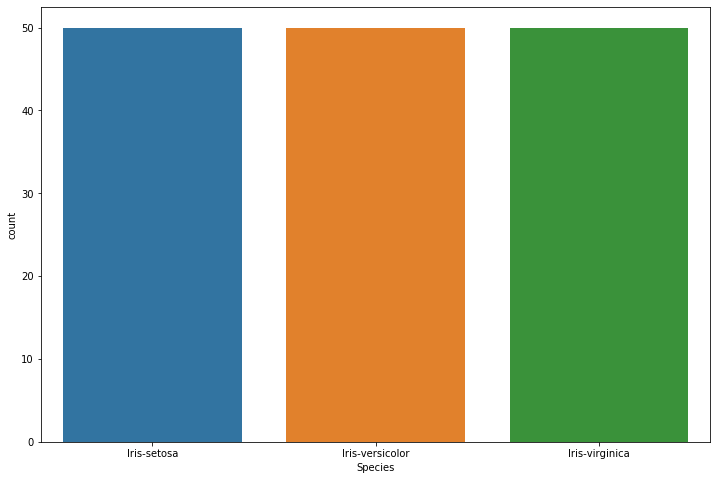

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x='Species',data=iris)

SepalLengthCm       AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalWidthCm     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalWidthCm     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

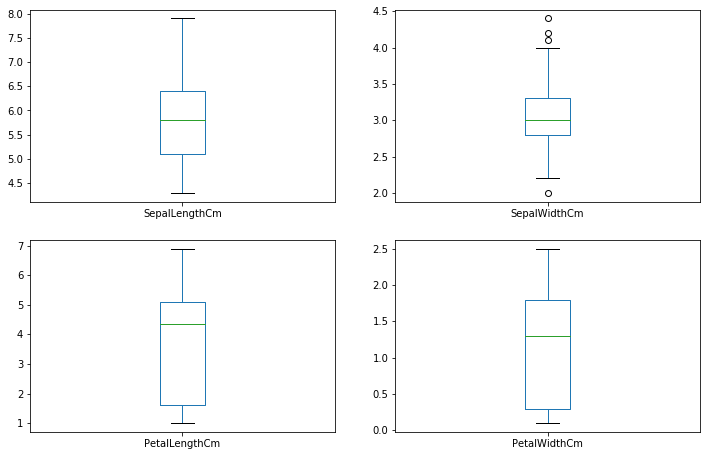

In [36]:
#Boxplot to check outliers
iris.plot(kind='box',subplots=True,layout=(3,2),figsize=(12,12),grid=False)

In [37]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


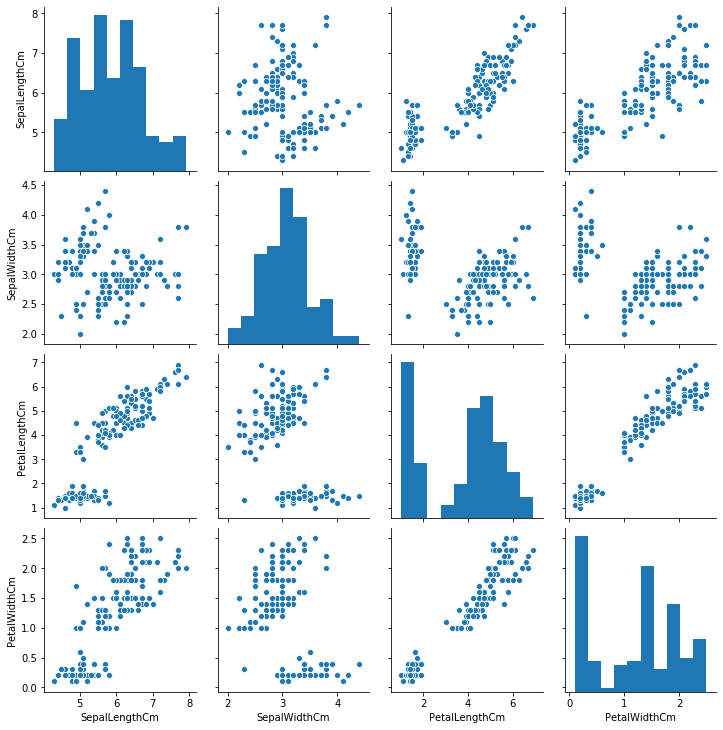

In [38]:
sns.pairplot(data=iris)

Train,Test,Split

we have necessary data, we can split the data into training and testing using scikit learn

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x = iris.drop(['Species'],axis=1)
y = iris['Species']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
#fitting the data
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
#predicting the Data
pred = dtree.predict(x_test)
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [45]:
#compare original and predicted data
df = pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
19,Iris-setosa,Iris-setosa
32,Iris-setosa,Iris-setosa
77,Iris-versicolor,Iris-virginica
116,Iris-virginica,Iris-virginica
13,Iris-setosa,Iris-setosa


Metric evaluation

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
pd.Series(pred).value_counts()

Iris-setosa        17
Iris-versicolor    16
Iris-virginica     12
dtype: int64

In [48]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



[[17  0  0]
 [ 0 14  1]
 [ 0  2 11]]


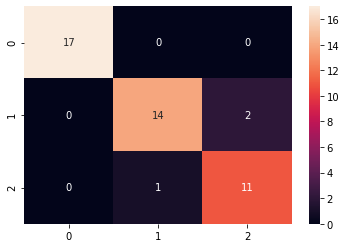

In [49]:
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(pred,y_test),annot = True)

In [50]:
np.mean(pred==y_test)

0.9333333333333333

In [ ]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
features_names=list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(dtree,feature_names=feature_names,class_names=class_names,filled=True)


[Text(1562.4, 2201.58, 'Petal_Length <= 2.35\ngini = 0.666\nsamples = 105\nvalue = [33, 35, 37]\nclass = Iris-virginica'),
 Text(1171.8000000000002, 1712.34, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Iris-setosa'),
 Text(1953.0, 1712.34, 'Petal_Width <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 35, 37]\nclass = Iris-virginica'),
 Text(781.2, 1223.1, 'Petal_Length <= 5.0\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]\nclass = Iris-versicolor'),
 Text(390.6, 733.8599999999999, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Iris-versicolor'),
 Text(1171.8000000000002, 733.8599999999999, 'Sepal_Length <= 6.15\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(781.2, 244.6199999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(1562.4, 244.6199999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),
 Text(3124.8, 1223.1, 'Petal_Length <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [

If we feed any data into the model, it will predict iris class accordingly.